# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [M. Revano Ananda Lubis]
- **Email:** [revano172003@gmail.com]
- **ID Dicoding:** [mrevanoanandalubis]

## Menentukan Pertanyaan Bisnis

- Pada pukul berapa rata-rata penyewaan sepeda paling tinggi dan paling rendah pada setiap harinya?
- Bagaimana jumlah penyewaan sepeda pada saat hari kerja?
- Pada musim apa penyewaan sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengimport data **day.csv** dan data **hour.csv**

In [ ]:
data_day = pd.read_csv('day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_hour = pd.read_csv('hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Data day.csv**

Melihat informasi di setiap kolom pada data **day.csv** seperti, jumlah data dan tipe data.

In [ ]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika dilihat dari data, tidak ada kolom yang jumlah datanya kurang dari kolom yang lain, ini artinya tidak terdapat missing value pada data tersebut sehingga kita tidak perlu lagi mengecek dan menghitung berapa jumlah missing value. Akan tetapi pada kolom dtday terjadi kesalahan tipe data, seharusnya tipe data pada kolom dteday adalah datetime.

Mengecek data duplikat pada data **day.csv**

In [ ]:
print("Jumlah data duplikat: ", data_day.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat data duplikat pada data day.csv

In [ ]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Data hour.csv**

Melihat informasi di setiap kolom pada data **hour.csv** seperti, jumlah data dan tipe data.

In [ ]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada data ini sama halnya seperti data day.csv yaitu tidak ada kolom yang jumlah datanya kurang dari kolom yang lain, ini artinya tidak terdapat missing value pada data tersebut sehingga kita tidak perlu lagi mengecek dan menghitung berapa jumlah missing value. Akan tetapi pada kolom dteday terjadi kesalahan tipe data, seharusnya tipe data pada kolom dtday adalah datetime.

Mengecek data duplikat pada data **hour.csv**

In [ ]:
print("Jumlah data duplikat: ", data_hour.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat data duplikat pada data hour.csv

In [ ]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari hasil penilaian data kita telah mengetahui bahwa pada kedua data tidak terdapat missing value dan data duplikat sehingga kita tidak perlu mengatasi masalah ini. Masalah yang terdapat di kedua data ialah kesalahan tipe data pada kolom dteday sehingga kita perlu mengubahnya.

Menangani kesalahan tipe data

In [ ]:
datetime = ["dteday"]

for column in datetime:
  data_day[column] = pd.to_datetime(data_day[column])
  data_hour[column] = pd.to_datetime(data_hour[column])

In [ ]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari hasil diatas dapat dilihat bahwa kesalahan tipe data sudah teratasi

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

In [ ]:
data_day.describe(include="all")

<ipython-input-24-4093f0a64953>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan hasil dari parameter statistik di atas, kita memperoleh bahwa rata-rata penggunaan sepeda sebanyak 4504. Rentang pengguna dimulai dari 22 hingga 8714 orang. Hal ini menunjukkan bahwa variasi jumlah penggunaan sepeda sangat bervariasi pada setiap harinya.

Analisis penggunaan sepeda saat hari kerja

In [ ]:
analisis_WorkingDay = data_day.groupby('workingday').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})
print(analisis_WorkingDay)

            casual  registered      cnt
workingday                             
0           316732      683537  1000269
1           303285     1989125  2292410


Dari hasil di atas, dapat dilihat bahwa total penggunaan sepeda pada saat hari kerja lebih tinggi dibandingkan pada saat hari tidak kerja. Pada hari kerja (1) total penggunaan sepeda berjumlah 2.292.410, dengan pengguna sebanyak 303.285 dan yang terdaftar sebanyak 1.989.125. Pada hari tidak kerja (0) total penggunaan sepeda berjumlah 1.000.269, dengan pengguna kasual sebanyak 316.732 dan yang terdaftar sebanyak 683.537. Hal ini menunjukkan bahwa tingkat penyewaan sepeda pada saat hari kerja lebih tinggi dibandingkan saat hari tidak kerja.

Analisis penggunaan sepeda pada setiap musim

In [ ]:
analisis_season = data_day.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})

#Mengubah niai angka dalam kolom seasom menjadi nama musim
data_day['season'] = data_day['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

print(analisis_season)

        casual  registered      cnt
season                             
fall    226091      835038  1061129
spring   60622      410726   471348
summer  203522      715067   918589
winter  129782      711831   841613


Berdasarkan hasil diatas, dapat disimpulkan bahwa jumlah penggunaan sepeda paling tinggi terjadi pada musim fall atau gugur yaitu sebesar 1.061.129

### Explore Data hour

Analisis penggunaan sepeda setiap jamnya perhari

In [ ]:
analisis_hour = data_hour.groupby('hr').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})

#Mengurutkan berdasarkan jumlah tertinggi
sorted_dataHour = analisis_hour.sort_values(by='cnt', ascending=False)
print(sorted_dataHour)

    casual  registered     cnt
hr                            
17   54220      282640  336860
18   44496      265276  309772
8    15761      245240  261001
16   53834      173914  227748
19   35505      191284  226789
13   52713      132206  184919
12   49718      134696  184414
15   54606      128543  183149
14   55089      120563  175652
20   26378      138172  164550
9    22458      136980  159438
7     8037      146134  154171
11   43286      108034  151320
10   33789       92468  126257
21   20570      104875  125445
22   16200       79412   95612
23   11065       52876   63941
6     3017       52115   55132
0     7375       31755   39130
1     4709       19455   24164
2     3412       12940   16352
5     1012       13249   14261
3     1893        6281    8174
4      874        3554    4428


Dapat dilihat dari hasil diatas bahwa rata-rata penggunaan sepeda paling tinggi terjadi pada pukul 17.00 dengan jumlah 336.860, dengan pengguna kasual sebanyak 54.220 dan yang terdaftar sebanyak 282.640 pengguna.  

### Explore All Data

Menggabungkan kedua file data

In [ ]:
all_data = pd.merge(left=data_day, right=data_hour, how="left", left_on='dteday', right_on='dteday')
all_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Data diatas merupakan hasil penggabungan dari dua file data yaitu day.csv dan hour.csv

## Visualization & Explanatory Analysis

### Pertanyaan 1: <br> Pada pukul berapa rata-rata penyewaan sepeda paling tinggi dan paling rendah pada setiap harinya?

In [ ]:
final_analisis_hour = all_data.groupby('hr').agg({'cnt_y': 'sum'})

#Mengurutkan berdasarkan jumlah tertinggi
final_sorted_dataHour = final_analisis_hour.sort_values(by='cnt_y', ascending=False)
print(final_sorted_dataHour)

     cnt_y
hr        
17  336860
18  309772
8   261001
16  227748
19  226789
13  184919
12  184414
15  183149
14  175652
20  164550
9   159438
7   154171
11  151320
10  126257
21  125445
22   95612
23   63941
6    55132
0    39130
1    24164
2    16352
5    14261
3     8174
4     4428


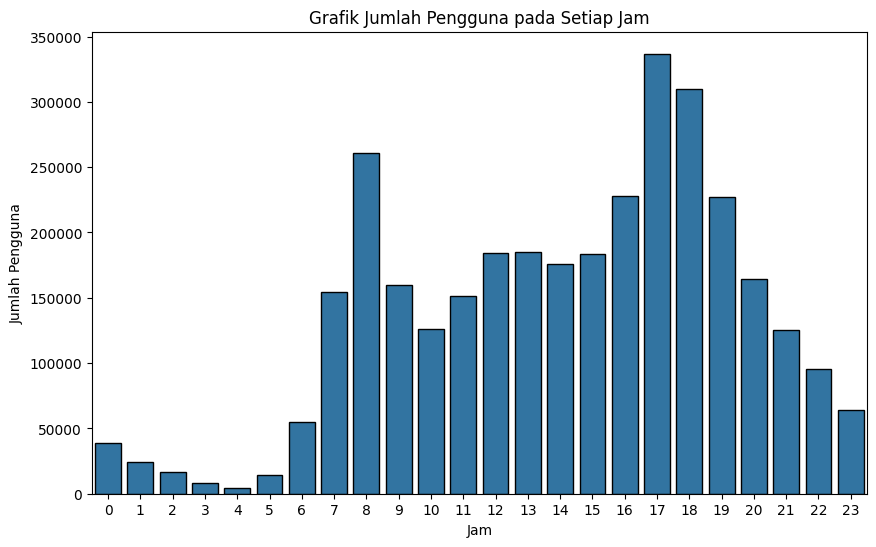

In [ ]:
#Membuat grafik untuk menampilkan penggunaan sepeda pada setiap jam perharinya
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_y', data=final_analisis_hour, edgecolor='black')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.title('Grafik Jumlah Pengguna pada Setiap Jam')
plt.show()

Dapat dilihat dari grafik diatas bahwa rata-rata penggunaan sepeda paling tinggi terjadi pada pukul 17.00 dengan jumlah 336.860 pengguna. Rata-rata penggunaan sepeda paling rendah terjadi pada pukul 04.00 dengan jumlah 4.428 pengguna.

### Pertanyaan 2: <br>Bagaimana jumlah penyewaan sepeda pada saat hari kerja?

In [ ]:
final_analisis_WorkingDay = all_data.groupby('workingday_y').agg({'cnt_y': 'sum'})

#Mengubah nilai angka dalam kolom menjadi Hari kerja dan Hari tidak kerja
all_data['workingday_y'] = all_data['workingday_y'].replace({0: 'Hari Tidak Kerja', 1: 'Hari Kerja'})
print(final_analisis_WorkingDay)

                    cnt_y
workingday_y             
Hari Kerja        2292410
Hari Tidak Kerja  1000269


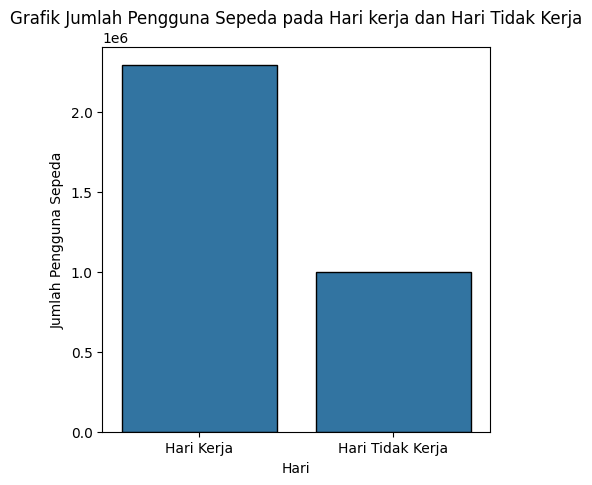

In [ ]:
#Membuat grafik untuk menampilkan jumlah penggunaan sepeda pada hari kerja dan hari tidak kerja
plt.figure(figsize=(5, 5))
sns.barplot(x='workingday_y', y='cnt_y', data=final_analisis_WorkingDay, edgecolor='black')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Grafik Jumlah Pengguna Sepeda pada Hari kerja dan Hari Tidak Kerja')
plt.show()

Dari grafik diatas dapat dilihat bahwa jumlah pengguanaan sepeda pada hari kerja lebih tinggi dibandingkan pada hari tidak kerja. Hari kerja memiliki jumlah 2.292.410 pengguna. Sedangkan pada hari tidak kerja memiliki pengguna 1.000.269 pengguna.

### Pertanyaan 3: <br> Pada musim apa penyewaan sepeda paling banyak?

In [ ]:
final_analisis_season = all_data.groupby('season_y').agg({'cnt_y': 'sum'})

#Mengubah niai angka dalam kolom seasom menjadi nama musim
all_data['season_y'] = all_data['season_y'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

print(final_analisis_season)

            cnt_y
season_y         
fall      1061129
spring     471348
summer     918589
winter     841613


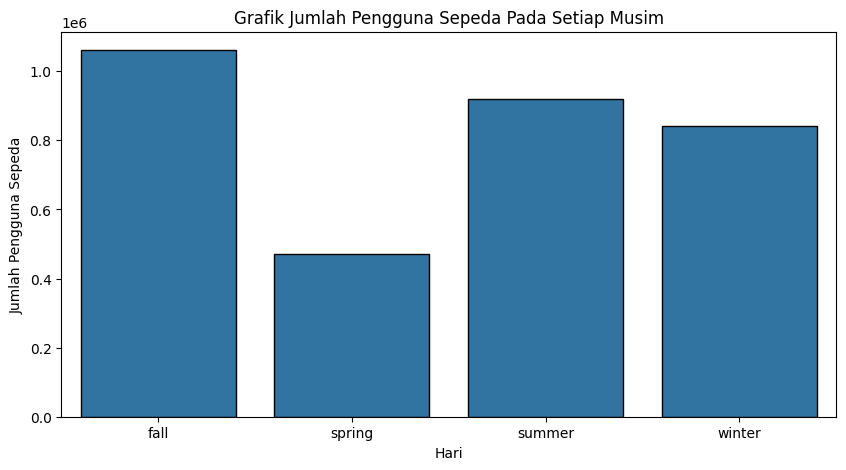

In [ ]:
#membuat grafik untuk menampilkan jumlah penggunaan sepeda pada setiap musim
plt.figure(figsize=(10, 5))
sns.barplot(x='season_y', y='cnt_y', data=final_analisis_season, edgecolor='black')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Grafik Jumlah Pengguna Sepeda Pada Setiap Musim')
plt.show()

Dapat dilihat dari grafik di atas bahwa penggunaan sepeda paling tinggi terjadi pada musim gugur (fall) dengan jumlah 1.061.129 pengguna. Sedangkan untuk penggunaan sepeda paling rendah terjadi pada musim semi (spring) dengan jumlah pengguna 471.348 pengguna.

### Analisis RFM

In [ ]:
recency_data = all_data.groupby('instant_x')['dteday'].max().reset_index()
recency_data['recency'] = (pd.Timestamp('2024-03-02') - pd.to_datetime(recency_data['dteday'])).dt.days
hasil_recency = recency_data[['instant_x', 'recency']]

hasil_frequency= all_data.groupby('instant_x').size().reset_index(name='frequency')

monetary_data = all_data.groupby('instant_x')['cnt_y'].sum().reset_index().rename(columns={'cnt_y': 'monetary'})
hasil_monetary = monetary_data[['instant_x', 'monetary']]

print(hasil_recency)
print(hasil_frequency)
print(hasil_monetary)

     instant_x  recency
0            1     4809
1            2     4808
2            3     4807
3            4     4806
4            5     4805
..         ...      ...
726        727     4083
727        728     4082
728        729     4081
729        730     4080
730        731     4079

[731 rows x 2 columns]
     instant_x  frequency
0            1         24
1            2         23
2            3         22
3            4         23
4            5         23
..         ...        ...
726        727         24
727        728         24
728        729         24
729        730         24
730        731         24

[731 rows x 2 columns]
     instant_x  monetary
0            1       985
1            2       801
2            3      1349
3            4      1562
4            5      1600
..         ...       ...
726        727      2114
727        728      3095
728        729      1341
729        730      1796
730        731      2729

[731 rows x 2 columns]


In [ ]:
rfm_combined = pd.merge(hasil_recency, hasil_frequency, on='instant_x')
rfm_combined = pd.merge(rfm_combined, hasil_monetary, on='instant_x')
rfm_combined

,instant_x,recency,frequency,monetary
0,1,4809,24,985
1,2,4808,23,801
2,3,4807,22,1349
3,4,4806,23,1562
4,5,4805,23,1600
...,...,...,...,...
726,727,4083,24,2114
727,728,4082,24,3095
728,729,4081,24,1341
729,730,4080,24,1796


In [ ]:
rfm_quartiles_calculated = rfm_combined[['recency', 'frequency', 'monetary']].quantile([0.25, 0.5, 0.75])
rfm_quartiles = rfm_quartiles_calculated.to_dict()

def calculate_rfm_segment(row):
    if row['recency'] <= rfm_quartiles['recency'][0.25]:
        r_score = 4
    elif row['recency'] <= rfm_quartiles['recency'][0.50]:
        r_score = 3
    elif row['recency'] <= rfm_quartiles['recency'][0.75]:
        r_score = 2
    else:
        r_score = 1

    if row['frequency'] <= rfm_quartiles['frequency'][0.25]:
        f_score = 1
    elif row['frequency'] <= rfm_quartiles['frequency'][0.50]:
        f_score = 2
    elif row['frequency'] <= rfm_quartiles['frequency'][0.75]:
        f_score = 3
    else:
        f_score = 4

    if row['monetary'] <= rfm_quartiles['monetary'][0.25]:
        m_score = 1
    elif row['monetary'] <= rfm_quartiles['monetary'][0.50]:
        m_score = 2
    elif row['monetary'] <= rfm_quartiles['monetary'][0.75]:
        m_score = 3
    else:
        m_score = 4

    return str(r_score) + str(f_score) + str(m_score)

rfm_combined['rfm_segment'] = rfm_combined.apply(calculate_rfm_segment, axis=1)

rfm_combined['rfm_score'] = rfm_combined[['recency', 'frequency', 'monetary']].sum(axis=1)

print(rfm_combined.head())


   instant_x  recency  frequency  monetary rfm_segment  rfm_score
0          1     4809         24       985         111       5818
1          2     4808         23       801         111       5632
2          3     4807         22      1349         111       6178
3          4     4806         23      1562         111       6391
4          5     4805         23      1600         111       6428


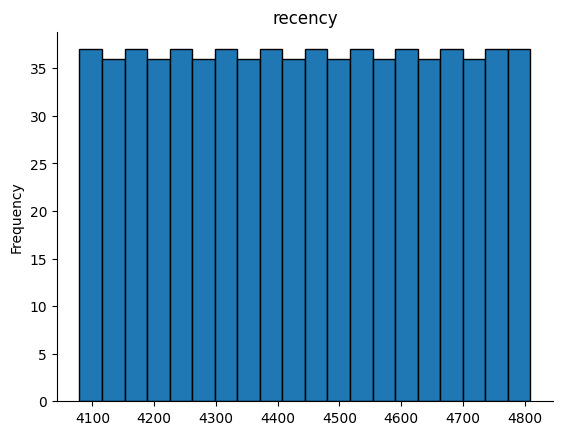

In [ ]:
rfm_combined['recency'].plot(kind='hist', bins=20, title='recency', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

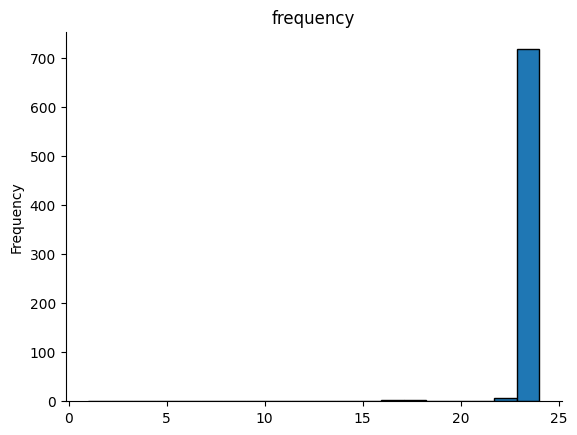

In [ ]:
rfm_combined['frequency'].plot(kind='hist', bins=20, title='frequency', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

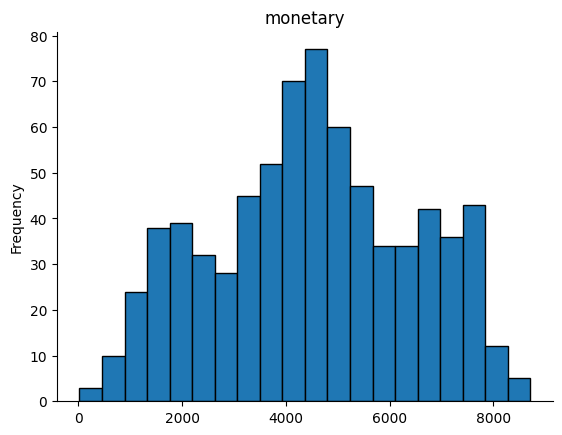

In [ ]:
rfm_combined['monetary'].plot(kind='hist', bins=20, title='monetary', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion

1. Pada pukul berapa rata-rata penyewaan sepeda paling tinggi dan paling rendah pada setiap harinya?
  - Berdasarkan hasil analisis yang telah dilakukan didapat bahwa rata-rata penggunaan sepeda paling tinggi terjadi pada pukul 17.00 dengan jumlah 336.860 pengguna. Disusul oleh jam 18.00 dengan jumlah 309.772 pengguna dan jam 08.00 dengan jumlah 261.001 pengguna. Rata-rata penggunaan sepeda paling rendah terjadi pada pukul 04.00 dengan jumlah 4.428 pengguna. Berdasarkan hal ini dapat disimpulkan poenggunaan sepeda tinggi pada saat sore hari. Dimana pada pukul tersebut orang-orang sudah selesai bekerja dan ingin kembali atau melaksanakan aktivitas lainnya.  

2. Bagaimana jumlah penyewaan sepeda pada saat hari kerja?
  - Berdasarkan hasil analisis yang telah dilakukan didapat bahwa penggunaan sepeda lebih tinggi pada saat hari kerja dibandingkan dengan hari tidak kerja. Jumlah penggunaan sepeda saat hari kerja adalah 2.292.410 pengguna, sedangkan pada saat hari tidak kerja penggunaan sepeda memiliki jumlah 1.000.269 pengguna. Berdasarkan hal ini dapat disimpulkan bahwa penggunaan sepeda lebih tinggi pada saat hari kerja dibandingkan saat hari tidak kerja.

3. Pada musim apa penyewaan sepeda paling banyak?
  - Berdasarkan hasil analisis yang telah dilakukan didapat bahwa musim dengan penggunaan sepeda tertinggi terjadi pada musim fall dengan jumlah 1.061.129 pengguna. Disusul oleh musim summer dengan jumlah 918.589 pengguna. Pada musim winter jumlah pengguna 841.613 pengguna. Dan terakhir musim spring degan jumlah 471.348 pengguna. Hal ini menunjukkan bahwa musim fall adalah musim yang paling diminati untuk penggunaan sepeda.   

In [ ]:
all_data.to_csv("all_data.csv", index=False)